In [410]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/married-at-first-sight/mafs.csv


In [411]:
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataset ini adalah tentang TV show perjodohan(mirip take me out) dan dari data ini saya mencari apakah yang keluar dari TV show ini(yang sudah jadian) akan tetap menikah atau cerai

In [412]:
data_nikah = pd.read_csv('/kaggle/input/married-at-first-sight/mafs.csv')
data_nikah

,Couple,Season,Location,Name,Age,Gender,Occupation,Decision,Status,DrPepperSchwartz,DrLoganLevkoff,DrJosephCilona,ChaplainGregEpstein,PastorCalvinRoberson,RachelDeAlto,DrJessicaGriffin,DrVivianaColes
0,1,1,New York City and Northern New Jersey,Jamie Otis-Hehner,27,F,Nurse,Yes,Married,1,1,1,1,0,0,0,0
1,1,1,New York City and Northern New Jersey,Doug Hehner,31,M,Software salesman,Yes,Married,1,1,1,1,0,0,0,0
2,2,1,New York City and Northern New Jersey,Cortney Hendrix,26,F,Make-up artist,Yes,Divorced,1,1,1,1,0,0,0,0
3,2,1,New York City and Northern New Jersey,Jason Carrion,27,M,Fireman,Yes,Divorced,1,1,1,1,0,0,0,0
4,3,1,New York City and Northern New Jersey,Monet Bell,33,F,Product development manager,No,Divorced,1,1,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,32,10,Washington D.C.,Brandon Reid,34,M,Sales Manager,No,Divorced,1,0,0,0,1,0,0,1
64,33,10,Washington D.C.,Meka Jones,25,F,Category Analyst,No,Divorced,1,0,0,0,1,0,0,1
65,33,10,Washington D.C.,Michael Watson,31,M,Education Director,Yes,Divorced,1,0,0,0,1,0,0,1
66,34,10,Washington D.C.,Mindy Shiben,34,F,Figure Skating Coach,No,Divorced,1,0,0,0,1,0,0,1


tingkat cerai dan tetap menikah berdasarkan umur

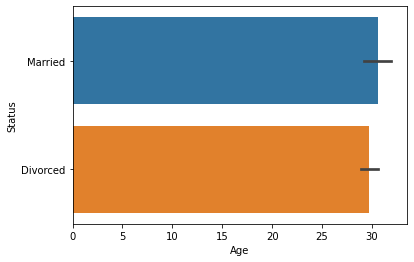

In [413]:
sns.barplot(x='Age',y='Status',data=data_nikah)

tingkat jumlah pasangan yang bermain di TV shownya(per season)

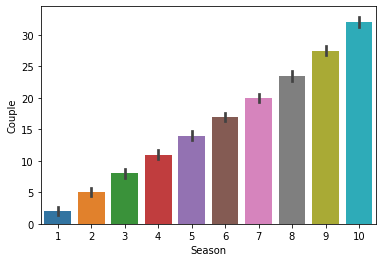

In [414]:
sns.barplot(x='Season',y='Couple',data=data_nikah)

jumlah pemain berdasarkan kota

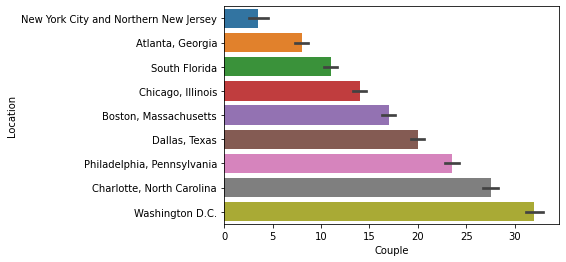

In [415]:
sns.barplot(x='Couple',y='Location',data=data_nikah)

In [416]:
def preprocesing_data(df):
    
    df['Gender'] = df['Gender'].map({'M':1,'F':0})
    df['Status'] = df['Status'].map({'Married':1,'Divorced':0})
    df['Decision'] = df['Decision'].map({'Yes':1,'No':0})
    df['Location'] = df['Location'].map({'New York City and Northern New Jersey':1,'Atlanta, Georgia':0,'South Florida':2,'Chicago, Illinois':3,'Boston, Massachusetts':4,'Dallas, Texas':5,'Philadelphia, Pennsylvania':6,'Charlotte, North Carolina':7,'Washington D.C.':8})
    df_final=df.drop(['Occupation','Name','DrPepperSchwartz','DrLoganLevkoff','DrJosephCilona','ChaplainGregEpstein','PastorCalvinRoberson','RachelDeAlto','DrJessicaGriffin','DrVivianaColes','Age'],axis=1)
    return df_final
trainfinal = preprocesing_data(data_nikah)
testfinal = preprocesing_data(data_nikah)
trainfinal

,Couple,Season,Location,Gender,Decision,Status
0,1,1,1,0,1,1
1,1,1,1,1,1,1
2,2,1,1,0,1,0
3,2,1,1,1,1,0
4,3,1,1,0,0,0
...,...,...,...,...,...,...
63,32,10,8,1,0,0
64,33,10,8,0,0,0
65,33,10,8,1,1,0
66,34,10,8,0,0,0


#split data csv

In [417]:
X= trainfinal[['Season','Decision','Status']]
y= trainfinal[['Location','Gender','Couple']]

In [418]:
X_train, X_test, y_train,y_test =train_test_split (X,y,test_size=0.5)

In [419]:
X_train = trainfinal.drop("Status", axis=1).fillna(0.0)
y_train = trainfinal["Status"]
X_test  = X_train.copy()
X_train.shape, y_train.shape, X_test.shape


((68, 5), (68,), (68, 5))

#ini pake Logistic regression

In [420]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

76.47

#ini pake cara SVC ML

In [421]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

73.53

pakai cara gaussian ML

In [422]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

55.88